**Part of identifying the best neighborhood by safety, is analyzing how many fire incidents happen in and around each neighborhood. The lower the number of fire incidents, the better and safer the neighborhood.**

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fire_url = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
fire_df = pd.read_csv(fire_url)
fire_df.head(100)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,F180027123,111.0,Building fire,"600 BLOCK LAUGHLIN AVE, PITTSBURGH PA 15210",1,2018-03-31T21:18:56,231EN22,2902.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-12,40.404851,-79.979715
96,97,F180026722,151.0,"Outside rubbish, trash or waste fire","2400 BLOCK BURHAM ST, PITTSBURGH PA 15203",0,2018-03-30T10:19:24,231EN22,1608.0,South Side Slopes,3.0,16.0,4.200316e+10,4.0,16.0,3.0,4-22,40.421208,-79.972416
97,98,F180027069,130.0,"Mobile property (vehicle) fire, Other","MURRAY AVE & FORWARD AVE, PITTSBURGH PA 15217",0,2018-03-31T16:50:02,231EN18,1413.0,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,40.429738,-79.923485
98,99,F180026043,162.0,Outside equipment fire,"FRIENDSHIP AVE & S ATLANTIC, PITTSBURGH PA 15224",0,2018-03-28T07:25:00,231EN08,806.0,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.461996,-79.938951


**Next we will get rid of the rows without information in them and remove all duplictes for a nice clean list of neighborhoods. Then we will sort that list into a clean table, displaying the neighborhoods.**

In [ ]:
fire_df = fire_df.dropna(subset=["neighborhood"]).drop_duplicates()
neighborhoods = pd.DataFrame(sorted(fire_df["neighborhood"].unique()), columns=["Neighborhoods"])
print(neighborhoods)
print("Number of unique neighborhoods:", len(neighborhoods))

**Here we can see that there are 91 unique neighborhoods listed with fire incidents throughout the city of Pittsburgh. Through this we can determine what the best neighborhood in Pittsburgh is based off of number of fire incidents and our metric of overall safety.**

**Next, for practical reasons, we need a list of all of the different types of fire incidents across all of the different neighborhoods. This will get us one step closer to determining the best neighborhood.**

In [16]:
fire_related = fire_df[fire_df["type_description"].str.contains("FIRE", case=False, na=False)]
fire_related["type_description"].value_counts().head(10)

type_description
Cooking fire, confined to container                2004
Building fire                                      1899
Passenger vehicle fire                              948
Outside rubbish, trash or waste fire                747
Brush or brush-and-grass mixture fire               542
Outside rubbish fire, Other                         534
Dumpster or other outside trash receptacle fire     434
Trash or rubbish fire, contained                    407
Natural vegetation fire, Other                      256
Special outside fire, Other                         224
Name: count, dtype: int64

**Here we have displayed the quantity of fires assigned to the different types of incidents that were reported.**

**Next, we will count how many fire incidents occurred in each neighborhood, then sort them from the least to the most incidents. Finally, we will display the first 85 neighborhoods on that list.**

In [1]:
fire_counts = fire_related["neighborhood"].value_counts().reset_index()
fire_counts.columns = ["neighborhood", "fire_incidents"]
fire_counts = fire_counts.sort_values(by="fire_incidents", ascending=True)
fire_counts.head(100)


NameError: name 'fire_related' is not defined

**Now we will place our data into two different bar graphs. The first bar graph displays the Top 10 Safest Neighborhoods in Pittsburgh. They are defined as the neighborhoods with the least amount of fire incidents. The second bar graph displays the Top 10 Neighborhoods with Most Fire Incidents in Pittsburgh. They are defined as the neighborhoods with the most amount of fire incidents.**

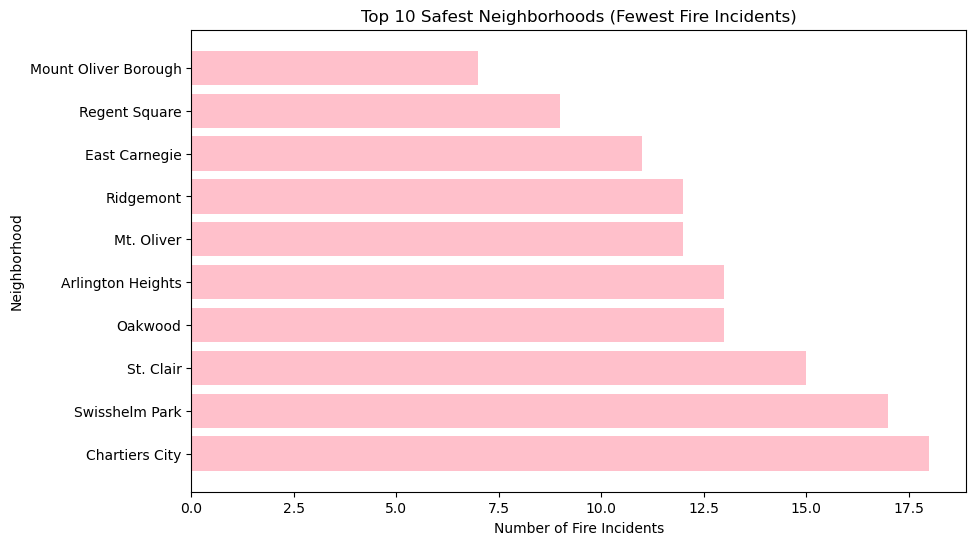

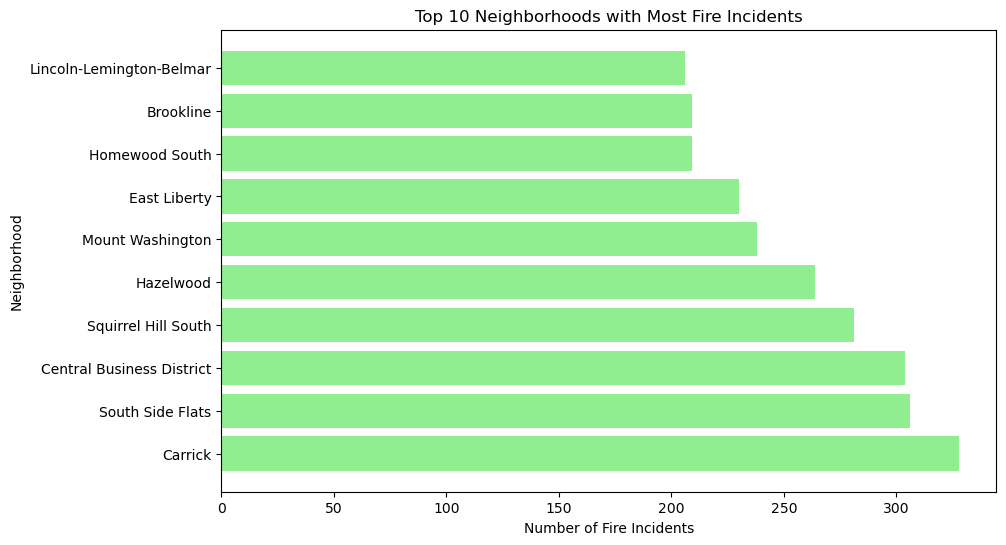

In [22]:
plt.figure(figsize=(10,6))
plt.barh(fire_counts["neighborhood"][:10], fire_counts["fire_incidents"][:10], color="pink")
plt.gca().invert_yaxis()
plt.title("Top 10 Safest Neighborhoods (Fewest Fire Incidents)")
plt.xlabel("Number of Fire Incidents")
plt.ylabel("Neighborhood")
plt.show()

plt.figure(figsize=(10,6))
plt.barh(fire_counts["neighborhood"][-10:], fire_counts["fire_incidents"][-10:], color="lightgreen")
plt.gca().invert_yaxis()
plt.title("Top 10 Neighborhoods with Most Fire Incidents")
plt.xlabel("Number of Fire Incidents")
plt.ylabel("Neighborhood")
plt.show()


**After looking at these two bar graphs, we can determine that "best" neighborhood in terms of fire incidents and fire safety is Mount Oliver Borough with 7 incidents.**

**Based on this dataset, the neighborhood with the fewest fire-related incidents is Mount Oliver Borough. This data overall suggests that this neighborhood has lower fire risks and possibly better prevention and/or fire response times.
The fire safety score shows the relative score of the other safest neighborhoods. On the other hand, the neighborhood of Carrick has the highest amount of fire-related incidents, suggesting the opposite.**